In [1]:
import pystan
import arviz

# this code is implemtetion of idea about inference of private data (found the idea on the web)

the expirment talks about how to make a discrete surevy to infere the number of cheaters, it goes as -> 
1) toss a coin
1.1) if it's head - answer the truth
1.2) if it's tail - toss the coin again and anwer the result of the coin

in this way if your answer was true, there no way know if it's from the random coin flip , or the actual private information.
one that see all the answers can dudce the correct number , because he knows how a coin flip should act.

in the implementation we implement this not as the generative model , but as a mixture model

In [2]:
model = """

data {
    int<lower=0> N; // number of people answered the survey
    int<lower=0, upper = 1> y[N]; // boolean array of answers
}

parameters {
    real<lower=0, upper=1> theta; // the latent variable we want to infer
}


model {
    theta ~ beta(0.5, 0.5); // beta prior
    for (i in 1:N){
        target +=
            log_mix(0.5, bernoulli_lpmf(y[i] | theta), bernoulli_lpmf(y[i] | 0.5));
    }
    
}
"""


In [3]:
results = [0 , 1 ,1, 1, 1 ,0, 0, 0 , 0 , 0, 0, 0]

exp_data = {
    'N': len(results),
    'y': results
}

In [4]:
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1faba59f95facd8bf45fceea85f1353e NOW.


In [5]:
fit = sm.sampling(data=exp_data, iter=1000, chains=4, control = {"adapt_delta" : 0.9})

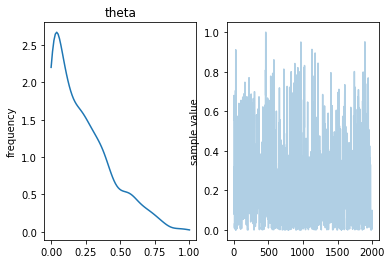

In [6]:
plt = fit.plot()

In [7]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.23  9.4e-3   0.21 6.2e-4   0.06   0.18   0.35   0.73    484   1.01
lp__   -9.25    0.05   0.97 -11.85  -9.56  -8.87  -8.59  -8.52    412   1.01

Samples were drawn using NUTS at Fri Dec 27 15:31:42 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
